# NITRIFICATION MODEL

Author: Emiel Kruisdijk,  Date: 12-08-2022

Based on data from de Kreuk 2007 BB Kinetic model of a granular sludge SBR: Influences on nutrient removal

https://onlinelibrary.wiley.com/doi/abs/10.1002/bit.21196

## Introduction

Welcome to this easy-to-use nitrification model! In this model, we try to guide you through the model step by step, and, afterwards, you will use the model to simulate nitrification and answer the questions asked.


In [1]:
#First, we will open all packages that are needed for the model and data analysis
import pandas as pd
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt

## Nitrification reaction equations

Nitrification is a two-step biological process, in which $NH_{4}$ is transformed to $NO_{3}$ with $NO_{2}$ as an intermittend product. See reaction equations below:

Step 1: $$ NH_{4}^{+} + 1.5O_{2}  \Rightarrow  NO_{2}^{-} + H_{2}O + 2H^{+} $$

Step 2: $$ NO_{2}^{-} + 0.5O_{2} \Rightarrow NO_{3}^{-} $$

Both reactions are extensively researched, and rate equations are known and often used.


## Rate equation nitrification (step 1)

Nitrification (Step 1):

The equation below can be used to calculate the  process rate of the first step of nitrification. It is a Monod-type rate equation, which is often used to present biological conversion processes. The equation is a differential equation, which can be used to calculate the rate of the biological conversion (thus: change of concentration over a period of time, dS/dT)

$$ Process \ rate = \mu _{max}^{AOB} x \frac{S_{O_{2}}}{K_{O_{2}}^{AOB}+S_{O_{2}}} x \frac{S_{NH}}{K_{NH}^{AOB}+S_{NH}} x X_{AOB}$$

where $\mu _{max}$ is the maximum growth rate of ammonium oxidizing bacteria (AOB), $S_{i}$ the concentration of solute i, $K_{i}$ the half-saturation coefficient of i, and $X_{AOB}$ is the COD concentration.

The values of the parameters in the rate equation are defined below.

## Rate equation nitrification (step 2)

Nitrification (Step 2):

A similar type of equation can be used to calculate the process rate of the second step of nitrification.

Rate equation:

$$ Process \ rate = \mu _{max}^{NOB} x \frac{S_{O_{2}}}{K_{O_{2}}^{NOB}+S_{O_{2}}} x \frac{S_{NO_{2}}}{K_{NO_{2}}^{NOB}+S_{NO_{2}}} x X_{NOB}$$

where $\mu _{max}$ is the maximum growth rate of nitrite oxidizing bacteria (AOB), and $X_{NOB}$ is the COD concentration.

The values of the parameters in the rate equation are defined below.

## Parameters used in simulation

Maximum specific growth rate (Xnh)  µ$_{NH}$ = 0.4 d$^{-1}$ --> In model unh

Maximum specific growth rate (Xno)  µ$_{NO}$ = 1.1 d$^{-1}$ --> In model uno

Nitrogen content of biomass  i$_{nbm}$ = 0.07 gN x gCOD$^{-1}$ --> In model inbm

Yield for growth of ammonium oxidizers  Y$_{NH}$ = 0.15 gCOD x gN$^{-1}$ --> In model Ynh

Yield for growth of nitrite oxidizers  Y$_{NO}$ = 0.041 gCOD x gN$^{-1}$ --> In model Yno

Half-saturation coefficient for oxygen (Xnh)  K$_{O2,NH}$ = 0.3 --> In model KO2nh

Half-saturation coefficient for ammonium (Xnh)  K$_{NH4,NH}$ = 2.4 --> In model Knh

Half-saturation coefficient for oxygen (Xno)  K$_{O2,NO}$ = 0.1 --> In model KO2no

Half-saturation coefficient for nitrite (Xno)  K$_{NO2,NO} = 0.238 --> In model KNO2no

In [2]:
#Parameters used in simulation

unh=0.4 #maximum specific growth rate (Xnh)
uno=1.1 #Maximum specific growth rate (Xno)

inbm=0.07 #Nitrogen content of biomass (gN x gCOD-1)

Ynh=0.15 #Yield for growth of ammonium oxidizers
Yno=0.041 #Yield for growth of nitrite oxidizers


KO2nh=0.3 #Half-saturation coefficient for oxygen (Xnh)
Knh=2.4 #Half-saturation coefficient for ammonium (Xnh)
KO2no=0.1 #Half-saturation coefficient for oxygen (Xno)
KNO2no=0.238 #Half-saturation coefficient for nitrite (Xno)

## Stoichiometric Matrix

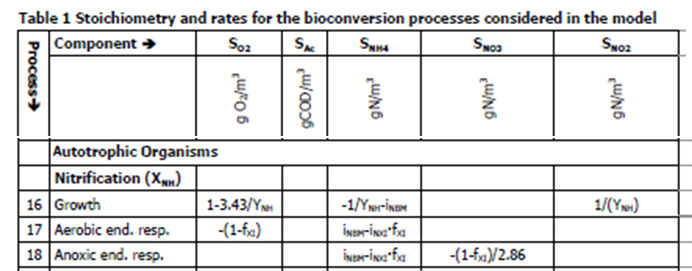

The figure above shows the stoichiometric matrix. This matrix shows the rates for the specific bioconversion processes. 

How to use this matrix?

First, we need to calculate a process rate with the Monod-type rate equations shown above. Second, we need to multiply the rate observed in the stoichiometrix matrix with the process rate to obtain the change in concentration for this specific parameter.

Let's,for example, calculate the change in oxygen concentration (S$_{O_{2}}$) during the first step of nitrification. This can be done by multiplying the process rate by the rate for the bioconversion of O$_{2}$. Combining both formulas you will end up with the following equation:

$$ Process \ rate \ O_{2} = (1-\frac{3.43}{Y_{NH}}) x \mu _{max}^{AOB} x \frac{S_{O_{2}}}{K_{O_{2}}^{AOB}+S_{O_{2}}} x \frac{S_{NH}}{K_{NH}^{AOB}+S_{NH}} x X_{AOB}$$

The last step is to plot the O$_2$ concentrations over time. And, therefore, we need to solve the differential equation. In the model below, we do this by dividing the period that we want to research in small timesteps. The model goes through all the timesteps one by one, and calculates for every timestep the process rate and multiplies this with the timestep. This gives the change in concentration during this timestep. Lastly, the change in concentration is added to the concentration calculated in the timestep before. A start concentration should be given to do this calculation for the first timestep.

These steps above should be repeated for the other solutes and biomass involved in nitrification.

## Simulating nitrification over time

Code:

#The widgets are the sliderbars above the model.
#These sliderbars can be used to easily change the model input
widgets.interact_manual.opts['manual_name'] = 'Start simulation'
@widgets.interact_manual(unh=(0.0,10), uno=(0.0, 10), SO2=(1,10), SNH4=(1,10), Xnh=(0.001, 1), Xno=(0.001, 1), 
                         tmin=(0.0,5.0), tmax=(1.0, 100.0), tstep=(0.01, 1))


def plot(unh=unh, uno=0.0, SO2=10, SNH4=10, Xnh=0.01, Xno=0.01, tmin=0.0, tmax=20.0, tstep=0.1):
    t=np.arange(tmin, tmax, tstep) #np.arange returns evenly spaced values (of the duration of the timestep)  
                                   #between tmin (start experiment) and tmax (end experiment).
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) #this function plots an empty figure, which will be filled
                                                          #with data in the model lines below.
    SNO2=0 #Start concentration NO2 is 0 g/m3
    SNO3=0 #Start concentration NO3 is 0 g/m3
    for i in t:
     
        ############################################################################
        #Process rate: First step
        Pr1= unh*(SO2/(KO2nh+SO2))*(SNH4/(Knh+SNH4))*Xnh #Process rate
        
        #Here the concentrations are calculated by: Concentrations = Process rate*timestep + old concentration
        Xnhnew= 1*Pr1*tstep+Xnh
        Xnh=Xnhnew
        SNHnew= (-1/Ynh-inbm)*Pr1*tstep+SNH4
        SNH4=SNHnew
        SNO2new= (1/Ynh)*Pr1*tstep+SNO2
        SNO2=SNO2new
        SO2new = (1-(3.43/Ynh))*Pr1*tstep+SO2
        SO2=SO2new
        
        #############################################################################
        #Process rate: Second step
        Pr2= uno*(SNO2/(KNO2no+SNO2))*(SO2/(KO2nh+SO2))*Xno #Process rate

        #Here the concentrations are calculated by: Concentrations = Process rate*timestep + old concentration
        Xnonew= 1*Pr2*tstep+Xno
        Xno=Xnonew
        SNO2new= (-1/Yno-inbm)*Pr2*tstep+SNO2
        SNO2=SNO2new
        SO2new = (1-(1.14/Yno))*Pr2*tstep+SO2
        SO2=SO2new
        SNO3new= (1/Yno)*Pr2*tstep+SNO3
        SNO3=SNO3new
    
        
        #############################################################################
        #The obtained data is plotted in the figure, where i represents the timestep. The biomass plots are given 
        #a different marker (triangle) than the solute concentrations (circle). Also the colors differ for each timeseries.
        ax2.scatter(i, Xnh, color='g', marker='>', label='Xnh')
        ax2.scatter(i, Xno, color='k', marker='>', label='Xno')
        ax1.scatter(i, SNH4, color='g', label='SNH4')
        ax1.scatter(i, SNO2, color='k', label='SNO2')
        ax1.scatter(i, SNO3, color='c', label='SNO3')
        ax1.scatter(i, SO2, color='y', label='SO2')
        #The if function is used to plot a legend, but only for the first timestep (t[0]), the labels in the lines above
        #are plotted together with the marker and color in the legend.
        if i == t[0]:
            ax1.legend()
            ax2.legend()
    #The lines below are used to create a 'nice' lay-out of the figure
    ax1.grid()
    ax2.grid()
    ax1.set_xlabel('Time (days)', fontsize=14)
    ax1.set_ylabel('Concentration (g/m$^{3}$)', fontsize=14)
    ax2.set_xlabel('Time (days)', fontsize=14)
    ax2.set_ylabel('Concentration (g/m$^{3}$)', fontsize=14)
    ax1.set_title('Solute concentrations', fontsize=18)
    ax2.set_title('Biomass concentrations', fontsize=18)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

In [3]:
#The widgets are the sliderbars above the model.
#These sliderbars can be used to easily change the model input
widgets.interact_manual.opts['manual_name'] = 'Start simulation'
@widgets.interact_manual(unh=(0.0,10), uno=(0.0, 10), SO2=(1,10), SNH4=(1,10), Xnh=(0.001, 1), Xno=(0.001, 1), 
                         tmin=(0.0,5.0), tmax=(1.0, 100.0), tstep=(0.01, 1))


def plot(unh=unh, uno=0.0, SO2=10, SNH4=10, Xnh=0.01, Xno=0.01, tmin=0.0, tmax=20.0, tstep=0.1):
    t=np.arange(tmin, tmax, tstep) #np.arange returns evenly spaced values (of the duration of the timestep)  
                                   #between tmin (start experiment) and tmax (end experiment).
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) #this function plots an empty figure, which will be filled
                                                          #with data in the model lines below.
    SNO2=0 #Start concentration NO2 is 0 g/m3
    SNO3=0 #Start concentration NO3 is 0 g/m3
    for i in t:
     
        ############################################################################
        #Process rate: First step
        Pr1= unh*(SO2/(KO2nh+SO2))*(SNH4/(Knh+SNH4))*Xnh #Process rate
        
        #Here the concentrations are calculated by: Concentrations = Process rate*timestep + old concentration
        Xnhnew= 1*Pr1*tstep+Xnh
        Xnh=Xnhnew
        SNHnew= (-1/Ynh-inbm)*Pr1*tstep+SNH4
        SNH4=SNHnew
        SNO2new= (1/Ynh)*Pr1*tstep+SNO2
        SNO2=SNO2new
        SO2new = (1-(3.43/Ynh))*Pr1*tstep+SO2
        SO2=SO2new
        
        #############################################################################
        #Process rate: Second step
        Pr2= uno*(SNO2/(KNO2no+SNO2))*(SO2/(KO2nh+SO2))*Xno #Process rate

        #Here the concentrations are calculated by: Concentrations = Process rate*timestep + old concentration
        Xnonew= 1*Pr2*tstep+Xno
        Xno=Xnonew
        SNO2new= (-1/Yno-inbm)*Pr2*tstep+SNO2
        SNO2=SNO2new
        SO2new = (1-(1.14/Yno))*Pr2*tstep+SO2
        SO2=SO2new
        SNO3new= (1/Yno)*Pr2*tstep+SNO3
        SNO3=SNO3new
    
        
        #############################################################################
        #The obtained data is plotted in the figure, where i represents the timestep. The biomass plots are given 
        #a different marker (triangle) than the solute concentrations (circle). Also the colors differ for each timeseries.
        ax2.scatter(i, Xnh, color='g', marker='>', label='Xnh')
        ax2.scatter(i, Xno, color='k', marker='>', label='Xno')
        ax1.scatter(i, SNH4, color='g', label='SNH4')
        ax1.scatter(i, SNO2, color='k', label='SNO2')
        ax1.scatter(i, SNO3, color='c', label='SNO3')
        ax1.scatter(i, SO2, color='y', label='SO2')
        #The if function is used to plot a legend, but only for the first timestep (t[0]), the labels in the lines above
        #are plotted together with the marker and color in the legend.
        if i == t[0]:
            ax1.legend()
            ax2.legend()
    #The lines below are used to create a 'nice' lay-out of the figure
    ax1.grid()
    ax2.grid()
    ax1.set_xlabel('Time (days)', fontsize=14)
    ax1.set_ylabel('Concentration (g/m$^{3}$)', fontsize=14)
    ax2.set_xlabel('Time (days)', fontsize=14)
    ax2.set_ylabel('Concentration (g/m$^{3}$)', fontsize=14)
    ax1.set_title('Solute concentrations', fontsize=18)
    ax2.set_title('Biomass concentrations', fontsize=18)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

interactive(children=(FloatSlider(value=0.4, description='unh', max=10.0), FloatSlider(value=0.0, description=…